In [13]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

# Part 1: Predicting with Hardcoded Model

In [3]:
# Loading train.csv to DataFrame and constructing a trainX and trainY tensor
train_df = pd.read_csv("train.csv")
train_tensor = torch.tensor(train_df.values, dtype=torch.float64)

trainX = train_tensor[:, [0,9]]

trainY = train_tensor[:, 10]
trainY = trainY.reshape(1044, -1)

In [4]:
# Loading test.csv to DataFrame and constructing a testX and testY tensor
test_df = pd.read_csv("test.csv")
test_tensor = torch.tensor(test_df.values, dtype=torch.float64)

testX = test_tensor[:, :-1]

testY = test_tensor[:, 10]
testY = testY.reshape(348, -1)

In [5]:
coef = torch.tensor([
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040], # POS_50_59_CP
        [0.0300], # POS_60_69_CP
        [0.0300],
        [0.0300],
        [0.0300]
], dtype=testX.dtype)

In [6]:
if torch.cuda.is_available():
    testX = testX.to("cuda")
    coef = coef.to("cuda")
predicted_deaths = testX[0] @ coef
predicted_deaths

tensor([9.8440], dtype=torch.float64)

# Part 2: R^2 Score

In [7]:
# Creating a predictedY tensor
predictedY = testX @ coef

# Function to calculate the R^2 score for any vector
def r2_score(testY, predictedY):
    
    if torch.cuda.is_available():
        testY = testY.to("cuda")
        
    testY_average = torch.mean(testY) 
    SStot_difference = testY - testY_average
    SStot = torch.sum(SStot_difference * SStot_difference)
    SSreg_difference = testY - predictedY
    SSreg = torch.sum(SSreg_difference * SSreg_difference)
    
    improvement = SStot - SSreg
    rsquared_score = improvement / SStot
    return rsquared_score

r2_score(testY, predictedY)

tensor(0.4110, dtype=torch.float64)

# Part 3: Optimization

tensor(0.0208, requires_grad=True) tensor(18., grad_fn=<AddBackward0>)
tensor(0.0421, requires_grad=True) tensor(17.9562, grad_fn=<AddBackward0>)
tensor(0.0639, requires_grad=True) tensor(17.9103, grad_fn=<AddBackward0>)
tensor(0.0864, requires_grad=True) tensor(17.8619, grad_fn=<AddBackward0>)
tensor(0.1096, requires_grad=True) tensor(17.8106, grad_fn=<AddBackward0>)
tensor(0.1335, requires_grad=True) tensor(17.7561, grad_fn=<AddBackward0>)
tensor(0.1583, requires_grad=True) tensor(17.6978, grad_fn=<AddBackward0>)
tensor(0.1840, requires_grad=True) tensor(17.6353, grad_fn=<AddBackward0>)
tensor(0.2108, requires_grad=True) tensor(17.5677, grad_fn=<AddBackward0>)
tensor(0.2388, requires_grad=True) tensor(17.4942, grad_fn=<AddBackward0>)
tensor(0.2682, requires_grad=True) tensor(17.4138, grad_fn=<AddBackward0>)
tensor(0.2992, requires_grad=True) tensor(17.3252, grad_fn=<AddBackward0>)
tensor(0.3319, requires_grad=True) tensor(17.2266, grad_fn=<AddBackward0>)
tensor(0.3668, requires_grad=

249.57606506347656

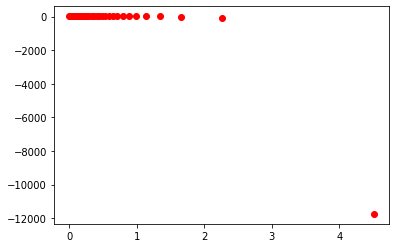

In [18]:
def f(x):
    return x**2 - 8**x + 19

x = torch.tensor(0.0, requires_grad=True)
y = x**2 - 8*x + 19
optimizer = torch.optim.SGD([x], lr=0.01)

for epoch in range(30):
    optimizer.zero_grad()
    y = f(x)
    plt.plot(x.detach(), y.detach(), "ro")
    y.backward()
    optimizer.step()
    print(x, y)
x.item()